In [2]:
# Basics
import pandas as pd
import numpy as np
from datetime import datetime


# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from windrose import WindroseAxes


# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

**Dataset description:**

1) Windfarm's data:
    - 1 dataset from 2013 to 2016; data recorded every 10 min.
    - 1 dataset from 2017 to January 2018; data recorded every 10 min.

2) Meteorological station data:
    - 1 dataset from 2013 to January 2018; data recorder every 3 hrs.



### 1) Load Windfarm's data 
    - 1.1 Preliminary analysis
    - 1.2 Concatenate windfarm dataframes

In [3]:
# Load windfarm's data:

# Dataset 1: windfarm's data between 2013 and 2016
df_13_16= pd.read_csv('la-haute-borne-data-2013-2016.csv', delimiter= ';')

# Dataset 2: windfarm's data between 2017 and 2018
df_17_18= pd.read_csv('la-haute-borne-data-2017-2020.csv', delimiter= ';')

**1.1 Preliminary analysis**

In [4]:
# Head of df_13_16; 138 columns are displayed
pd.set_option('display.max_columns', None)
df_13_16.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80711,2013-01-07T01:20:00+01:00,41.160000,-1.000000,44.990002,11.27,12.65,12.0,13.0,0.41,204.71001,125.760000,987.83002,140.620000,-6.15,-6.39000,-5.8900,0.08000,-1.380000,-5.620000,-0.70,0.890000,0.000000,-0.79,0.130000,0.030000,1.38,0.700000,5.62000,0.890000,1.00,1.00,1.00,0.00,202.28,123.620000,985.67999,140.580000,28.330000,28.000000,28.500000,0.10,25.990000,25.799999,26.200001,0.12,32.580002,32.049999,32.950001,0.20,36.950001,36.750000,37.200001,0.08,37.110001,37.099998,37.200001,0.02,37.779999,37.599998,38.049999,0.05,38.430000,38.200001,38.650002,0.10,18.75000,18.75000,18.75000,0.00,20.570000,20.500000,20.600000,0.04,3.36,1.84,5.54,0.53,3.74,2.35,5.41,0.51,3.55,2.16,5.28,0.50,22.77000,336.81000,72.489998,10.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04,-41.950001,53.730000,10.74,5.25,5.2,5.3,0.05,49.980000,49.959999,50.009998,0.01,705.81000,704.90997,706.41998,0.34,1.91,1.17,9.34,1.32,18.299999,18.299999,18.299999,0.00,-69.540001,-311.60999,-15.660000,30.809999,NaN,NaN,NaN,NaN,37.77000,NaN,NaN,NaN,33.75000,NaN,NaN,NaN
1,R80711,2013-01-05T22:20:00+01:00,-1.000000,-1.000000,-0.870000,0.01,12.95,12.0,13.0,0.16,1157.03000,968.130000,1370.16000,106.870000,1556.76,834.54999,2278.9399,344.91000,161.860000,47.680000,301.62,60.209999,20.170000,10.61,25.120001,2.970000,163.41,50.060001,302.07999,59.549999,0.99,1.00,0.91,0.02,1155.52,966.429990,1368.72000,106.940000,29.580000,28.900000,30.299999,0.33,28.090000,27.500000,28.700001,0.34,42.130001,40.450001,43.650002,0.69,53.970001,53.200001,54.650002,0.37,53.459999,52.599998,54.099998,0.50,43.459999,43.000000,43.950001,0.26,44.369999,43.849998,44.700001,0.22,264.92999,259.12000,285.45999,10.53,20.610001,20.500000,20.799999,0.10,5.07,3.47,6.92,0.58,5.54,3.84,7.57,0.62,5.30,3.68,7.24,0.58,298.35001,242.80000,326.350010,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.88,-39.160000,49.709999,15.27,4.77,4.7,4.9,0.08,50.020000,50.000000,50.049999,0.01,703.96002,701.51001,705.13000,0.77,11.00,9.19,13.06,1.02,20.709999,20.500000,20.900000,0.12,1302.110000,470.04001,2110.980000,389.280000,NaN,NaN,NaN,NaN,313.35001,NaN,NaN,NaN,279.92999,NaN,NaN,NaN
2,R80711,2013-01-06T08:30:00+01:00,-1.000000,-1.000000,-1.000000,0.00,13.74,13.0,14.0,0.35,1021.18000,970.070010,1090.63000,34.230000,1142.24,759.06000,1384.6300,120.20000,91.400002,47.220001,125.49,16.010000,22.740000,12.86,29.740000,2.390000,94.32,52.430000,127.89000,15.540000,0.96,0.99,0.91,0.01,1019.75,968.700010,1089.18990,34.250000,42.520000,41.750000,43.200001,0.36,41.549999,40.900002,42.000000,0.28,64.589996,63.150002,66.150002,0.52,53.660000,53.299999,54.099998,0.16,51.779999,51.299999,52.299999,0.26,45.049999,44.599998,45.750000,0.23,46.009998,45.700001,46.250000,0.11,231.67999,231.67999,231.67999,0.00,23.240000,18.900000,24.000000,1.32,4.64,3.12,6.25,0.51,4.82,3.29,6.38,0.52,4.73,3.21,6.27,0.49,226.59000,173.67000,258.269990,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.09,-58.009998,26.590000,12

In [5]:
# Checking shapes of windfarm's dataframes:

print('Shape 2013-2016:', df_13_16.shape)
print('Shape 2017-2018:', df_17_18.shape)

Shape 2013-2016: (840380, 138)
Shape 2017-2018: (217588, 138)


In [6]:
# Checking the number of wind turbines and number records/turbine:
df_13_16['Wind_turbine_name'].value_counts() # 4 turbines; 2013 - 2016

R80736    210095
R80790    210095
R80721    210095
R80711    210095
Name: Wind_turbine_name, dtype: int64

In [7]:
# Checking the number of wind turbines and number records/turbine:
df_17_18['Wind_turbine_name'].value_counts() # 4 turbines 2017-2018

R80721    54433
R80736    54433
R80711    54433
R80790    54289
Name: Wind_turbine_name, dtype: int64

**1.2 Concat windfarm dataframes**

In [8]:
frames = [df_13_16, df_17_18] 
df_turb = pd.concat(frames) # concat df_13_16 & df_17_18

print('Shape of windfarm dataframe:', df_turb.shape)  # result shape

Shape of windfarm dataframe: (1057968, 138)


In [9]:
# Delete df_13_16 & df_17_18
del df_13_16
del df_17_18

In [10]:
# Sort dataframe by datetime and reset index:
df_turb= df_turb.sort_values('Date_time')
df_turb= df_turb.reset_index()

### 2) Preprocessing 
    - 2.1 Deletion of features with high NaN %
    - 2.2 Feature cleansing
    - 2.3 Create 1 dataframe per turbine
    - 2.4 Visualization of windfarm's data

**2.1 Deletion of features with high NaN %**

In [11]:
# Calculate % of NaN
nulls= df_turb.isnull().sum()/len(df_turb)*100

In [12]:
# Display columns and NaN %
#pd.set_option('display.max_rows', None) # to display all rows
nulls

index                  0.000000
Wind_turbine_name      0.000000
Date_time              0.000000
Ba_avg                 0.626673
Ba_min                 0.626673
                        ...    
Wa_c_std             100.000000
Na_c_avg              20.586350
Na_c_min             100.000000
Na_c_max             100.000000
Na_c_std             100.000000
Length: 139, dtype: float64

In [13]:
# Append on a list features/columns with NaN ≥ 20%

columns_high_NaN= []   # list

for column, NaN in zip(df_turb.columns, nulls): # iterate through columns and % NaN
    if NaN >= 20:  
        columns_high_NaN.append(column) # appends column name if NaN >= 20

In [14]:
# Drop columns with NaN ≥ 20% from list of column names 
df_turb= df_turb.drop(columns_high_NaN, axis=1)

**2.2 Feature cleansing**
        
    - The correlation matrix has been used to delete features that (1) show excessive           correlation between each others, (2) are too correlataed with P (power) and (3) their     correlation is too low with the P. 
       
    - This process has been carried out with previous understanding of the significance each from feature

In [15]:
# Heatmap with correlation matrix from all windfarm's features
# -- See 'heatmap in Jupyter Notebooks folder
#sns.set(rc={'figure.figsize':(100,100)}) 
#sns.heatmap(df_turb.corr(), annot = True, cmap = "Blues")

In [16]:
# Drop columns non-correlated with the target (P)
df_turb= df_turb.drop(['Rbt_std', 'Rs_std', 'Nu_std',
                     'Nf_std',   'Nf_min',  'Nf_max', 'Nf_avg',
                     'Va_std',   'Va_min',  'Va_max', 'Va_avg',
                     'Wa_std',   'Wa_min',  'Ya_avg', 'Ya_min',
                     'Ya_max',   'Gost_std','Git_std','Gb1t_std',
                     'Gb2t_std', 'Db2t_std','Db2t_min','Db2t_max',
                     'Db2t_avg', 'Db1t_std','Db1t_min','Db1t_max',
                     'Db1t_avg', 'Cosphi_std','Cosphi_min','Cosphi_max',
                     'Cosphi_avg','DCs_std', 'Rt_std', 'Rt_min', 
                     'Rt_max', 'Rt_avg', 'Ba_std'], axis = 1)

In [17]:
# Drop columns that have excessive correlation (aprox 1 and -1) with another feature
df_turb= df_turb.drop(['Wa_max', 'Nu_max', 'Nu_min', 'Nu_avg', 'Ya_std',
                     'Ds_std', 'Rm_std', 'Rm_avg', 'Rm_max', 'Rm_min',
                     'DCs_avg', 'DCs_max', 'DCs_min', 'Ds_avg', 'Ds_max',
                     'Ds_min', 'Gb1t_max', 'Gb1t_min', 'Gb2t_min', 'Gb2t_max',
                     'Dst_max', 'S_max', 'S_min', 'S_std', 'S_avg', 'Cm_max',
                     'Cm_min', 'Cm_std', 'Cm_avg', 'Dst_std'], axis = 1)

**2.3 Create 1 dataframe per turbine**

    - goal: concat with meteorological data each generator's dataframe
    - fill missing values with interpolate()


In [18]:
# Function to clean 'Date_time' format
def clean_date(string):
    return " ".join(string.split("+")[0].split("T")) 

In [19]:
# Clean "Date_time"
df_turb["Date_time"] = df_turb["Date_time"].apply(clean_date)

In [20]:
# Create a dictionary of dataframes with 'Wind_turbine_name' as keys
dict_frames = dict(tuple(df_turb.groupby('Wind_turbine_name')))

# Save each dataframe within a new variable name
df_turb11 = dict_frames['R80711']
df_turb21 = dict_frames['R80721']
df_turb36 = dict_frames['R80736']
df_turb90 = dict_frames['R80790']

In [21]:
del dict_frames # del dictionary to save some space

**2.4 Visualization of windfarm's data**

/Users/alexschaub/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


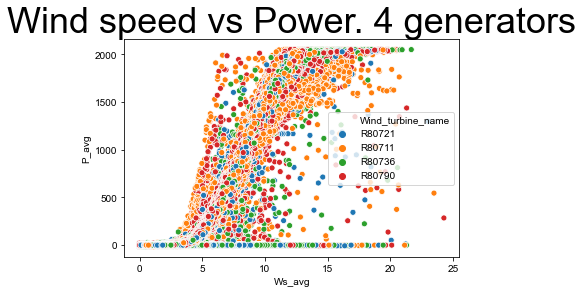

In [23]:
# Power vs Wind Speed. 4 turbines, each one with a different color
sns.scatterplot(data=df_turb, x="Ws_avg", y="P_avg", hue="Wind_turbine_name")
sns.set(font_scale= 3)
plt.title('Wind speed vs Power. 4 generators')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [24]:
# Select values recorded when the machine is stopped but the anemometers still work
sel_rows=df_turb[(df_turb['P_avg']<=0) &  (df_turb['Ws_avg']> 4.6)].index # where P <= 0 and Ws_avg > 4.6

In [25]:
# Delete selected rows from df_gen
df_turb = df_turb.drop(sel_rows, axis=0)

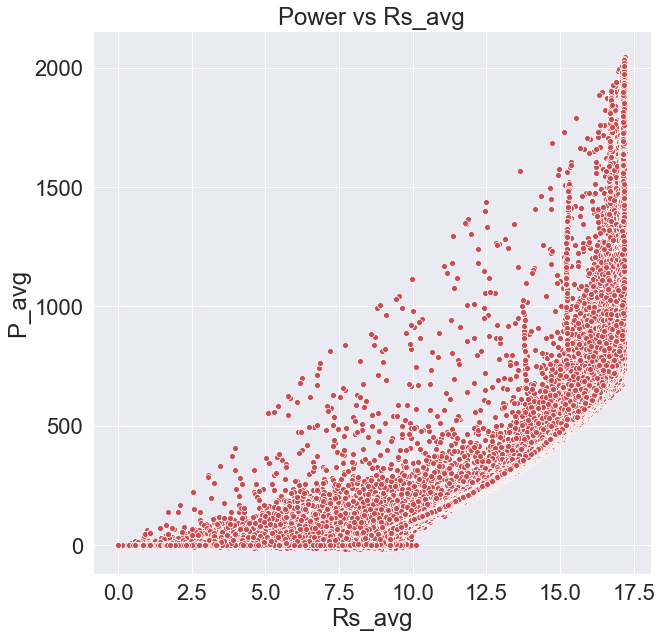

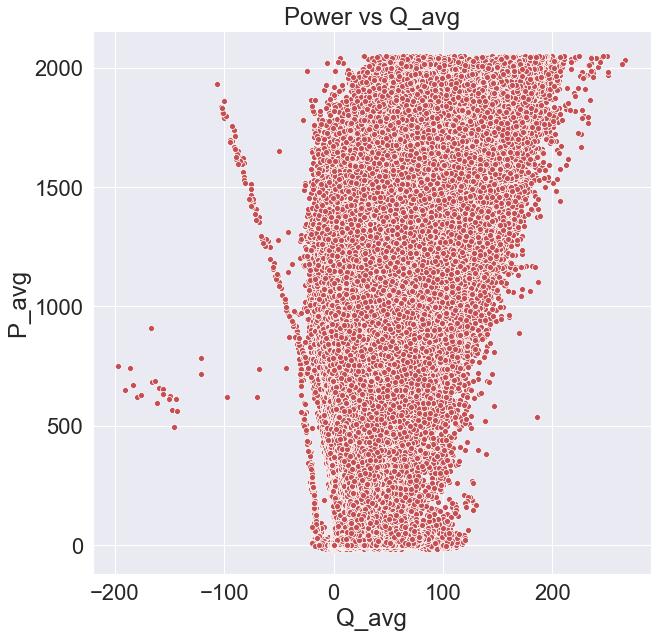

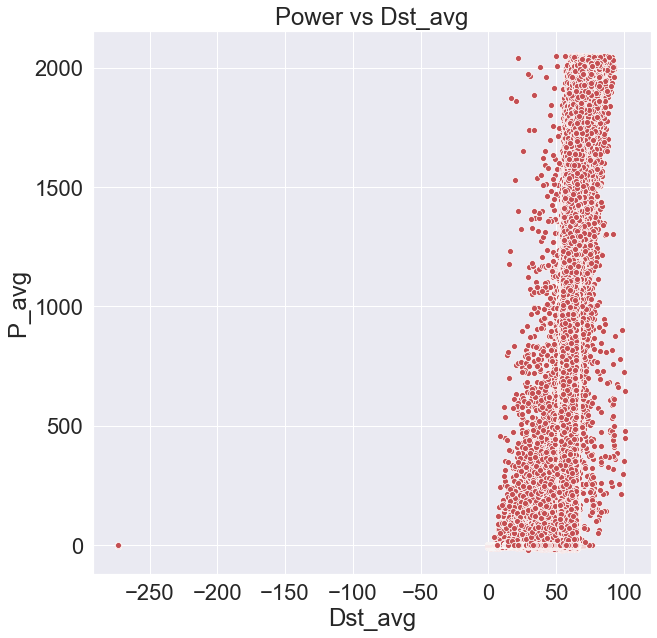

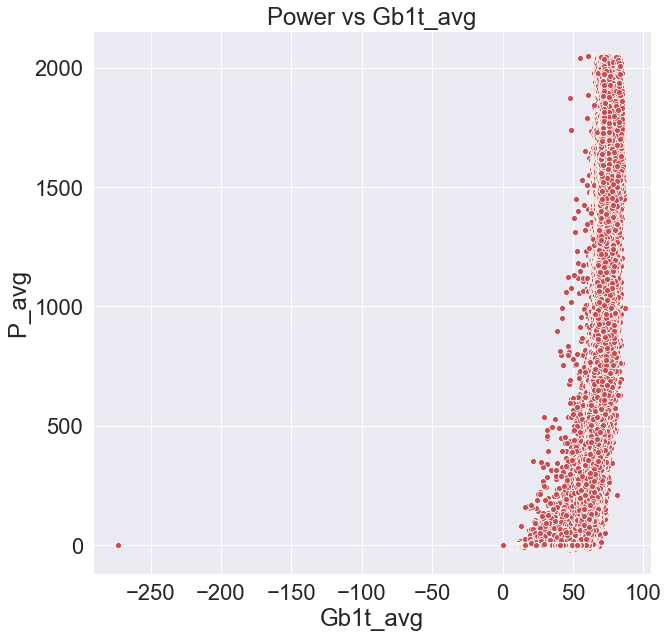

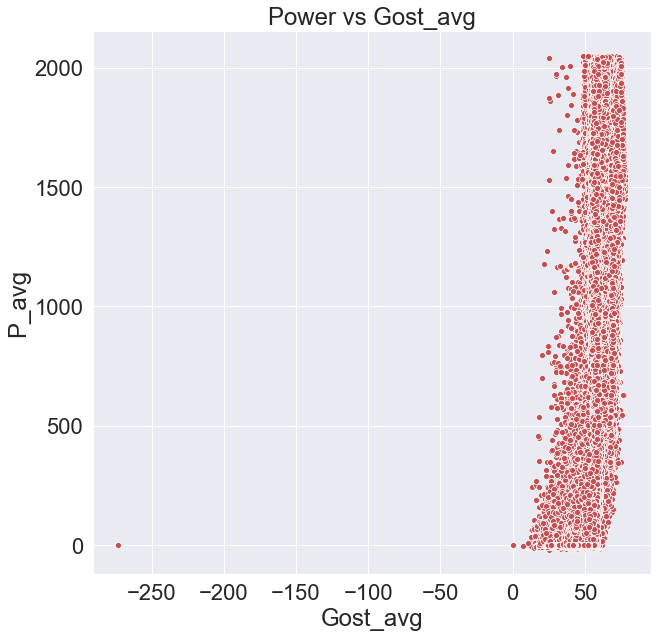

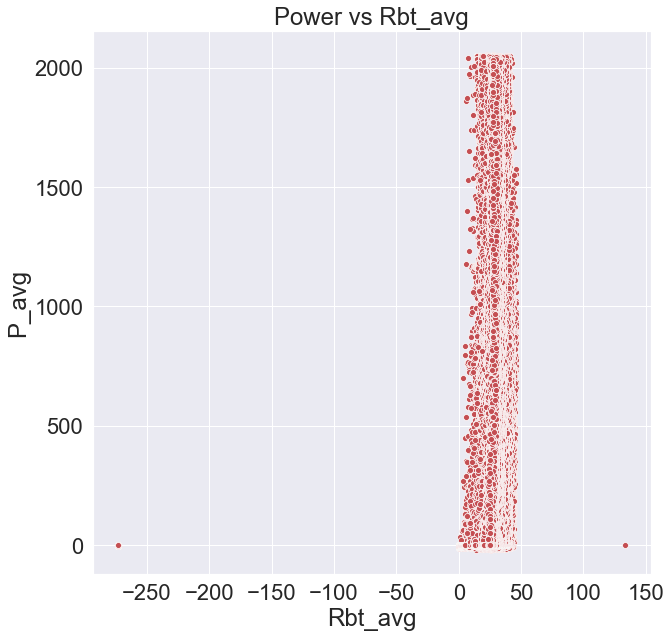

In [26]:
# Plot 'P_Avg' (power) vs rotor speed(RS), reactive power (Q_avg), stator temperature (DST), gearbox bearing temperature
# (Gb1t), gearbox oil temperature (Gost), rotor bearing temperature (Rbt)
for i in [ 'Rs_avg','Q_avg', 'Dst_avg', 'Gb1t_avg', 'Gost_avg','Rbt_avg']:
    sns.set(font_scale=2)
    sns.scatterplot(df_turb[i] ,df_turb.P_avg, color="r")
    plt.title('Power vs'+' '+i)
    sns.set(rc={'figure.figsize':(10,10)})
    plt.show()

### 3) Meteorological Data (independent station): processing

In [28]:
# Load csv with meteorological data
df_met = pd.read_csv('donnees-synop-essentielles-omm_TRUE.csv', delimiter= ';')

In [29]:
# Drop static useless data, such as city name, department etc...
df_met=df_met.drop(['Nom',          
'ID OMM station','Altitude','Longitude','Latitude',
'communes (name)','communes (code)','EPCI (name)',
'EPCI (code)','department (name)','department (code)',
'region (name)','region (code)','mois_de_l_annee','Coordonnees'], axis=1)

In [30]:
# Calculate % nulls per column
nulls_meteo= df_met.isnull().sum()/len(df_met)*100
for column, percentage in zip(df_met.columns, nulls_meteo):
    print(column, percentage)

Date 0.0
Pression au niveau mer 0.006929046563192905
Variation de pression en 3 heures 0.05543237250554324
Type de tendance barométrique 0.05543237250554324
Direction du vent moyen 10 mn 0.02771618625277162
Vitesse du vent moyen 10 mn 0.020787139689578713
Température 0.0
Point de rosée 0.0
Humidité 0.0
Visibilité horizontale 0.0
Temps présent 0.09700665188470067
Temps passé 1 62.922671840354774
Temps passé 2 63.21369179600887
Nebulosité totale 21.91657427937916
Nébulosité  des nuages de l' étage inférieur 6.042128603104214
Hauteur de la base des nuages de l'étage inférieur 22.68569844789357
Type des nuages de l'étage inférieur 57.99611973392461
Type des nuages de l'étage moyen 61.4329268292683
Type des nuages de l'étage supérieur 61.883314855875824
Pression station 0.006929046563192905
Niveau barométrique 100.0
Géopotentiel 100.0
Variation de pression en 24 heures 39.308481152993345
Température minimale sur 12 heures 75.03464523281596
Température minimale sur 24 heures 100.0
Températur

In [31]:
# Append on a list features/columns with NaN ≥ 20%

columns_high_NaN= []   # list

for column, NaN in zip(df_met.columns, nulls_meteo): # iterate through columns and % NaN
    if NaN >= 18:  
        columns_high_NaN.append(column) # appends column name if NaN >= 20

In [32]:
df_met = df_met.drop(columns_high_NaN, axis=1)

In [33]:
# Delete irrelevant or repetitive information (already present in windfarm's data)
df_met = df_met.drop(['Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 
                      'Vitesse du vent moyen 10 mn','Temps présent', 
                      'Periode de mesure de la rafale', 'Point de rosée', 'Type de tendance barométrique.1',
                      'Temps présent.1', 'Température (°C)', 'Température' ], axis=1)

In [34]:
# Function: clean date time column / erase '+'
def clean_date(string):
    return " ".join(string.split("+")[0].split("T")) 

# Clean date
df_met["Date"] = df_met["Date"].apply(clean_date)

In [35]:
# Sort values by date 
df_met=df_met.sort_values(by='Date')

In [36]:
# After deleting several columns:
df_met.head()

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Humidité,Visibilité horizontale,Nébulosité des nuages de l' étage inférieur,Pression station,Rafales sur une période,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures
4545,2013-01-01 01:00:00,100270.0,-80.0,6.0,91,15000.0,8.0,99700.0,15.4,0.6,2.0
13413,2013-01-01 04:00:00,100210.0,-60.0,6.0,93,30000.0,8.0,99640.0,9.8,0.2,1.0
8299,2013-01-01 07:00:00,100170.0,-40.0,6.0,94,15000.0,8.0,99600.0,8.7,0.0,0.0
7024,2013-01-01 10:00:00,100480.0,310.0,3.0,89,40000.0,6.0,99910.0,12.3,0.0,0.6
9024,2013-01-01 13:00:00,100830.0,350.0,1.0,74,40000.0,4.0,100260.0,11.3,0.0,0.2


### 4) Feature Engineering 

    - 4.1 Time variables creation
    - 4.2 Create the target: P_3h
    - 4.3 Merge turbines with meteo
    - 4.4 Interpolate missing meteorological records

**4.1 Time variables creation**

    - Calculate variables 6h, 3h, 1h before each time record --> rolling()
    - Calculate TI (turbulence intensity) 
   

In [40]:
# To avoid default warning when applying .rolling()
pd.options.mode.chained_assignment = None  

In [41]:
# Define function with rolling()
def rolling_function(dataframe, new_column, variable, win_size):
    dataframe[new_column]= dataframe[variable].rolling(win_size).mean()
    return dataframe[new_column]

In [42]:
# Apply rolling_function 3 times (1h, 3h, 6h) to: each df (dataframes) for 10 features (variables)
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90]
variables = ['Git_avg', 'Ot_avg', 'Yt_avg', 'Rs_avg', 'Gb2t_avg',
             'Gb1t_avg', 'Gost_avg', 'Wa_avg', 'Ba_avg', 'Rbt_avg']
windows= [7, 19, 37]
names_hours= ['1h', '3h', '6h']

for dataframe in dataframes:
    for variable in variables:
        for window, name  in zip(windows, names_hours): # iterates through nº rows and names of new features

            rolling_function(dataframe, variable + '_' + name, variable, int(window))           

In [43]:
# Calculate Turbulence intensity for each turbine --> std.dev Wind speed / avg Wind speed
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90]
for d in dataframes: 
    d["TI"] = d["Ws_std"]/ d["Ws_avg"]

**4.2 Create the target: P_3h**

In [44]:
# Calculate target (P_3h) for each generator
# Apply rolling on reverse mode to calculate P_3h (it takes 19 following rows)
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90]
for d in dataframes:
    d["P_3h"] = d["P_avg"].iloc[::-1].rolling(19).mean() 
    d.P_3h= d.P_3h.shift(periods=18) # Shift/push P_3h row 19 lines on each df

In [45]:
df_turb11= df_turb11.dropna(axis=0, subset=['P_3h'])
df_turb21= df_turb21.dropna(axis=0, subset=['P_3h'])
df_turb36= df_turb36.dropna(axis=0, subset=['P_3h'])
df_turb90= df_turb90.dropna(axis=0, subset=['P_3h'])

In [46]:
# Remove 'P_avg', 'P_min', 'P_max', 'P_std' to avoid overfitting; they were used to create our target(P_3h)
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90]
for d in dataframes:
    del d['P_avg']
    del d['P_min']
    del d['P_max']
    del d['P_std']

In [47]:
df_turb11.shape

(261941, 79)

In [48]:
df_turb21.head()

,index,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Q_avg,Q_min,Q_max,Q_std,Dst_avg,Dst_min,Gb1t_avg,Gb2t_avg,Git_avg,Git_min,Git_max,Gost_avg,Gost_min,Gost_max,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Ot_avg,Ot_min,Ot_max,Ot_std,Rs_avg,Rs_min,Rs_max,Rbt_avg,Rbt_min,Rbt_max,Git_avg_1h,Git_avg_3h,Git_avg_6h,Ot_avg_1h,Ot_avg_3h,Ot_avg_6h,Yt_avg_1h,Yt_avg_3h,Yt_avg_6h,Rs_avg_1h,Rs_avg_3h,Rs_avg_6h,Gb2t_avg_1h,Gb2t_avg_3h,Gb2t_avg_6h,Gb1t_avg_1h,Gb1t_avg_3h,Gb1t_avg_6h,Gost_avg_1h,Gost_avg_3h,Gost_avg_6h,Wa_avg_1h,Wa_avg_3h,Wa_avg_6h,Ba_avg_1h,Ba_avg_3h,Ba_avg_6h,Rbt_avg_1h,Rbt_avg_3h,Rbt_avg_6h,TI,P_3h
75,530672,R80721,2013-01-01 03:00:00,-1.02,-1.05,-1.00,60.590000,42.869999,83.949997,7.82,58.919998,57.250000,72.550003,72.790001,56.730000,55.700001,57.750000,57.169998,56.200001,58.200001,25.809999,24.299999,26.900000,0.79,7.860000,5.18,11.28,1.11,8.00,5.53,11.42,1.07,7.93,5.46,11.21,1.06,179.06000,6.50,6.30,6.8,0.12,16.91,15.210000,17.340000,26.000000,25.900000,26.200001,52.118571,49.333684,NaN,6.604286,6.448421,NaN,22.832857,21.273158,NaN,16.714286,16.874211,NaN,72.464287,71.742632,NaN,71.638572,70.593685,NaN,56.222857,54.841053,NaN,177.317141,172.048947,NaN,-1.017143,-1.017895,NaN,25.920000,25.883158,NaN,0.133670,839.705793
77,491030,R80721,2013-01-01 03:10:00,-1.03,-1.06,-1.01,69.050003,43.200001,102.630000,9.80,60.599998,58.849998,74.570000,74.449997,56.740002,51.349998,58.750000,58.599998,57.950001,59.200001,27.410000,25.700001,28.200001,0.64,7.970000,5.32,11.10,1.10,8.13,5.35,11.26,1.13,8.05,5.48,10.93,1.09,175.72000,6.26,6.10,6.3,0.05,17.08,16.280001,17.389999,26.190001,26.000000,26.299999,52.112857,49.967368,NaN,6.572857,6.476842,NaN,22.768571,21.925789,NaN,16.720000,16.912105,NaN,72.588572,71.911052,NaN,71.730000,70.924737,NaN,56.424285,55.054210,NaN,177.418571,172.710000,NaN,-1.018571,-1.018947,NaN,25.975715,25.898947,NaN,0.135404,850.844215
83,152094,R80721,2013-01-01 03:20:00,-1.03,-1.06,-1.01,87.169998,59.060001,127.920000,18.33,62.520000,60.549999,73.199997,73.739998,50.980000,50.099998,52.099998,57.669998,57.000000,58.400002,24.530001,23.900000,25.700001,0.52,8.240000,5.61,11.38,1.11,8.50,5.72,11.87,1.17,8.37,5.72,11.53,1.11,172.99001,6.12,6.00,6.3,0.09,17.16,16.670000,17.389999,26.209999,26.200001,26.299999,51.268571,50.178947,NaN,6.510000,6.486316,NaN,22.168571,22.162632,NaN,16.742857,16.920526,NaN,72.497143,72.066315,NaN,71.505714,71.153158,NaN,56.328571,55.231052,NaN,176.914287,173.266316,NaN,-1.020000,-1.019474,NaN,26.020000,25.915263,NaN,0.132616,858.343690
86,217514,R80721,2013-01-01 03:30:00,-0.97,-1.04,0.06,95.290001,66.059998,130.039990,11.84,64.339996,62.400002,72.489998,73.029999,50.459999,49.099998,51.349998,57.160000,56.849998,57.400002,23.530001,21.400000,23.900000,0.36,8.770001,5.55,13.55,1.30,9.03,5.83,12.71,1.29,8.90,5.75,13.13,1.26,173.44000,5.91,5.70,6.0,0.07,17.15,16.340000,17.480000,26.280001,26.200001,26.400000,51.250000,50.302631,NaN,6.408571,6.472632,NaN,22.040000,22.274211,NaN,16.781429,16.922105,NaN,72.458571,72.158947,NaN,71.474286,71.297368,NaN,56.307142,55.374210,NaN,176.438573,173.658948,NaN,-1.012857,-1.016842,NaN,26.062857,25.935263,NaN,0.141573,869.322112
89,233255,R80721,2013-01-01 03:40:00,-0.76,-1.03,5.59,111.470000,80.419998,144.100010,12.85,66.129997,64.849998,71.849998,72.830002,47.310001,45.750000,49.099998,56.209999,55.450001,57.200001,16.799999,14.700000,21.400000,1.66,9.720000,6.59,13.90,1.48,10.00,6.80,14.31,1.49,9.86,6.81,13.95,1.45,173.96001,5.74,5.65,5.9,0.07,17.16,16.809999,17.639999,26.309999,26.299999,26.400000,51.494286,50.227894,NaN,6.271429,6.436316,NaN,22.071428,21.999474,NaN,16.815714,16.921579,NaN,72.537143,72.217895,NaN,71.742857,71.344737,NaN,56.449999,55.452631,NaN,175.978576,173.971054,NaN,-0.975714,-1.002632,NaN,26.114286,25.955263,NaN,0.147059,881.806317


**4.3 Merge turbines with meteo**

In [49]:
# Create common column 'datetime' in all generator frames and df_met 
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90]
for d in dataframes:
    d.insert(2, 'datetime', d.Date_time) # 4 turbines
df_met.insert(2, 'datetime', df_met.Date) # meteo 

In [50]:
#Convert 'datetime' column to_datetime type
dataframes = [df_turb11, df_turb21, df_turb36, df_turb90, df_met]
for d in dataframes:
    d.datetime = pd.to_datetime(d.datetime)
    d.set_index("datetime",inplace=True) # Set 'datetime' column as index in all dataframes

In [51]:
# Merge turbine's dataframes with df_met
df_turb11= pd.merge(df_met, df_turb11, how="outer", left_index=True, right_index=True)
df_turb21= pd.merge(df_met, df_turb21, how="outer", left_index=True, right_index=True)
df_turb36= pd.merge(df_met, df_turb36, how="outer", left_index=True, right_index=True)
df_turb90= pd.merge(df_met, df_turb90, how="outer", left_index=True, right_index=True)

In [52]:
df_turb11.head(40)

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Humidité,Visibilité horizontale,Nébulosité des nuages de l' étage inférieur,Pression station,Rafales sur une période,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,index,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Q_avg,Q_min,Q_max,Q_std,Dst_avg,Dst_min,Gb1t_avg,Gb2t_avg,Git_avg,Git_min,Git_max,Gost_avg,Gost_min,Gost_max,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Ot_avg,Ot_min,Ot_max,Ot_std,Rs_avg,Rs_min,Rs_max,Rbt_avg,Rbt_min,Rbt_max,Git_avg_1h,Git_avg_3h,Git_avg_6h,Ot_avg_1h,Ot_avg_3h,Ot_avg_6h,Yt_avg_1h,Yt_avg_3h,Yt_avg_6h,Rs_avg_1h,Rs_avg_3h,Rs_avg_6h,Gb2t_avg_1h,Gb2t_avg_3h,Gb2t_avg_6h,Gb1t_avg_1h,Gb1t_avg_3h,Gb1t_avg_6h,Gost_avg_1h,Gost_avg_3h,Gost_avg_6h,Wa_avg_1h,Wa_avg_3h,Wa_avg_6h,Ba_avg_1h,Ba_avg_3h,Ba_avg_6h,Rbt_avg_1h,Rbt_avg_3h,Rbt_avg_6h,TI,P_3h
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01 01:00:00,100270.0,-80.0,6.0,91.0,15000.0,8.0,99700.0,15.4,0.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470398.0,R80711,2013-01-01 03:00:00,-1.00,-1.0,-1.000000,21.290001,-3.240000,43.619999,9.130000,63.610001,62.250000,67.580002,71.139999,50.700001,50.150002,51.299999,57.650002,56.900002,58.049999,21.980000,21.700001,22.200001,0.12,7.740000,4.67,10.84,1.05,8.200000,5.20,11.660000,1.08,7.970000,5.17,11.200000,1.04,182.21001,5.84,5.6,6.0,0.07,16.940001,15.380000,17.340000,28.700001,28.700001,28.700001,52.431429,50.170000,NaN,5.885714,5.745790,NaN,17.861429,17.492632,NaN,17.048572,17.128421,NaN,71.617143,71.315263,NaN,68.642856,67.684211,NaN,57.125715,56.577895,NaN,179.874286,174.558421,NaN,-0.997143,-0.995263,NaN,28.445715,28.565790,NaN,0.130489,1138.436318
2013-01-01 03:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80997.0,R80711,2013-01-01 03:10:00,-1.00,-1.0,-1.000000,23.870001,-5.430000,50.759998,10.700000,64.980003,63.599998,66.559998,70.919998,49.110001,46.900002,51.049999,57.130001,56.400002,57.549999,19.799999,15.700000,22.000000,2.42,8.200000,4.83,11.59,1.16,8.550000,5.48,11.750000,1.20,8.380000,5.16,11.670000,1.15,180.19000,5.60,5.5,5.8,0.04,17.020000,15.820000,17.480000,28.680000,28.500000,28.700001,53.354286,50.208947,NaN,5.870000,5.772632,NaN,18.707143,17.864737,NaN,17.025715,17.120000,NaN,71.697142,71.361578,NaN,68.875713,67.791053,NaN,57.498572,56.738421,NaN,180.785714,175.344736,NaN,-0.997143,-0.995263,NaN,28.484286,28.564211,NaN,0.137232,1129.231055
2013-01-01 03:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524477.0,R80711,2013-01-01 03:20:00,-0.99,-1.0,0.000000,32.049999,-1.240000,62.480000,14.680000,64.239998,62.849998,64.599998,70.739998,45.720001,44.750000,47.250000,56.049999,55.599998,56.650002,14.240000,13.200000,15.700000,0.70,8.740000,5.51,12.95,1.36,8.990000,5.82,13.100000,1.36,8.860000,5.78,12.920000,1.33,177.50000,5.46,5.3,5.6,0.09,17.110001,15.850000,17.410000,28.490000,28.400000,28.600000,52.642858,49.716316,NaN,5.830000,5.783158,NaN,18.937143,17.825263,NaN,17.015715,17.116842,NaN,71.797142,71.345789,NaN,68.819999,67.581053,NaN,57.798572,56.706316,NaN,180.657144,175.829474,NaN,-0.997143,-0.994737,NaN,28.518572,28.553158,NaN,0.150113,1130.405260
2013-01-01 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525343.0,R80711,2013-01-01 03:30:00,-0.99,-1.0,-0.040000,42.259998,-4.820000,77.820000,17.160000,61.950001,60.099998,64.389999,70.510002,42.540001,40.750000,45.000000,55.189999,54.700001,55.799999,12.660000,12.200000,13.200000,0.32,8.930000,5.62,12.65,1.32

**4.4 Interpolate missing meteorological records.**

In [53]:
# List of frames and columns to interpolate
d_frame= [df_turb11, df_turb21, df_turb36, df_turb90]
c_columns= ["Pression au niveau mer", "Variation de pression en 3 heures", "Humidité", 
         "Visibilité horizontale", "Pression station", "Rafales sur une période", 
         "Précipitations dans la dernière heure", "Précipitations dans les 3 dernières heures"]

# Interpolation of quantitative columns from df_met
for d in d_frame:
    for c in c_columns:
        d[c]= d[c].interpolate()

### 5) Work with all data: turbines + meteo

    - 5.1 Concatenate all turbines with meteo
    - 5.2 Processing all data
    - 5.3 Create variables from months and years

**5.1 Concatenate all turbines with meteo**

In [55]:
# Concatenate 3 dataframes without duplicates
df_4turb= pd.concat([df_turb11, df_turb21, df_turb36, df_turb90]).drop_duplicates() #.reset_index(drop=True)

In [56]:
del [df_turb11, df_turb21, df_turb36, df_turb90, df_met] # save memory

In [57]:
df_4turb.shape

(1047705, 90)

**5.2 Processing all data**

In [58]:
#pd.set_option('display.max_columns', None)
df_4turb.head()

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Humidité,Visibilité horizontale,Nébulosité des nuages de l' étage inférieur,Pression station,Rafales sur une période,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,index,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Q_avg,Q_min,Q_max,Q_std,Dst_avg,Dst_min,Gb1t_avg,Gb2t_avg,Git_avg,Git_min,Git_max,Gost_avg,Gost_min,Gost_max,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Ot_avg,Ot_min,Ot_max,Ot_std,Rs_avg,Rs_min,Rs_max,Rbt_avg,Rbt_min,Rbt_max,Git_avg_1h,Git_avg_3h,Git_avg_6h,Ot_avg_1h,Ot_avg_3h,Ot_avg_6h,Yt_avg_1h,Yt_avg_3h,Yt_avg_6h,Rs_avg_1h,Rs_avg_3h,Rs_avg_6h,Gb2t_avg_1h,Gb2t_avg_3h,Gb2t_avg_6h,Gb1t_avg_1h,Gb1t_avg_3h,Gb1t_avg_6h,Gost_avg_1h,Gost_avg_3h,Gost_avg_6h,Wa_avg_1h,Wa_avg_3h,Wa_avg_6h,Ba_avg_1h,Ba_avg_3h,Ba_avg_6h,Rbt_avg_1h,Rbt_avg_3h,Rbt_avg_6h,TI,P_3h
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01 01:00:00,100270.000000,-80.000000,6.0,91.000000,15000.000000,8.0,99700.000000,15.4,0.600000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01 03:00:00,NaN,100261.428571,-77.142857,NaN,91.285714,17142.857143,NaN,99691.428571,14.6,0.542857,1.857143,470398.0,R80711,2013-01-01 03:00:00,-1.00,-1.0,-1.00,21.290001,-3.24,43.619999,9.13,63.610001,62.250000,67.580002,71.139999,50.700001,50.150002,51.299999,57.650002,56.900002,58.049999,21.980000,21.700001,22.200001,0.12,7.74,4.67,10.84,1.05,8.20,5.20,11.66,1.08,7.97,5.17,11.20,1.04,182.21001,5.84,5.6,6.0,0.07,16.940001,15.380000,17.34,28.700001,28.700001,28.700001,52.431429,50.170000,NaN,5.885714,5.745790,NaN,17.861429,17.492632,NaN,17.048572,17.128421,NaN,71.617143,71.315263,NaN,68.642856,67.684211,NaN,57.125715,56.577895,NaN,179.874286,174.558421,NaN,-0.997143,-0.995263,NaN,28.445715,28.565790,NaN,0.130489,1138.436318
2013-01-01 03:10:00,NaN,100252.857143,-74.285714,NaN,91.571429,19285.714286,NaN,99682.857143,13.8,0.485714,1.714286,80997.0,R80711,2013-01-01 03:10:00,-1.00,-1.0,-1.00,23.870001,-5.43,50.759998,10.70,64.980003,63.599998,66.559998,70.919998,49.110001,46.900002,51.049999,57.130001,56.400002,57.549999,19.799999,15.700000,22.000000,2.42,8.20,4.83,11.59,1.16,8.55,5.48,11.75,1.20,8.38,5.16,11.67,1.15,180.19000,5.60,5.5,5.8,0.04,17.020000,15.820000,17.48,28.680000,28.500000,28.700001,53.354286,50.208947,NaN,5.870000,5.772632,NaN,18.707143,17.864737,NaN,17.025715,17.120000,NaN,71.697142,71.361578,NaN,68.875713,67.791053,NaN,57.498572,56.738421,NaN,180.785714,175.344736,NaN,-0.997143,-0.995263,NaN,28.484286,28.564211,NaN,0.137232,1129.231055
2013-01-01 03:20:00,NaN,100244.285714,-71.428571,NaN,91.857143,21428.571429,NaN,99674.285714,13.0,0.428571,1.571429,524477.0,R80711,2013-01-01 03:20:00,-0.99,-1.0,0.00,32.049999,-1.24,62.480000,14.68,64.239998,62.849998,64.599998,70.739998,45.720001,44.750000,47.250000,56.049999,55.599998,56.650002,14.240000,13.200000,15.700000,0.70,8.74,5.51,12.95,1.36,8.99,5.82,13.10,1.36,8.86,5.78,12.92,1.33,177.50000,5.46,5.3,5.6,0.09,17.110001,15.850000,17.41,28.490000,28.400000,28.600000,52.642858,49.716316,NaN,5.830000,5.783158,NaN,18.937143,17.825263,NaN,17.015715,17.116842,NaN,71.797142,71.345789,NaN,68.819999,67.581053,NaN,57.798572,56.706316,NaN,180.657144,175.829474,NaN,-0.997143,-0.994737,NaN,28.518572,28.553158,NaN,0.150113,1130.405260
2013-01-01 03:30:00,NaN,100235.714286,-68.571429,NaN,92.142857,23571.428571,NaN,99665.714286,12.2,0.371429,1.428571,525343.0,R80711,2013-01-01 03:30:00,-0.99,-1.0,-0.04,42.259998,-4.82,77.820000,17.16,61.950001,60.099998,64.389999,70.510

In [59]:
# Drop first 145 columns due to NaNs produced during rolling() function 
# 6h / turbine 
df_4turb= df_4turb.drop(df_4turb.index[range(0,144)])

In [60]:
# Drop due to high amount of NaN
df_4turb= df_4turb.drop(["Date", 
                           "Type de tendance barométrique",
                           "Nébulosité  des nuages de l' étage inférieur",
                           "index"], axis=1)

In [61]:
# Change names of columns from meteo
col_dict= {'Pression au niveau mer': 'pr_sl', 'Variation de pression en 3 heures': 'pr_3h', 
         'Humidité': 'Hum', 'Visibilité horizontale': 'Vis_hor', 'Pression station': 'pr_st',
         'Rafales sur une période': 'W_blast', 'Précipitations dans la dernière heure': 'Rain_1h',
         'Précipitations dans les 3 dernières heures': 'Rain_3h',
         'Hauteur de base 1': 'Hgt_base1'}

df_4turb.columns = [col_dict.get(x, x) for x in df_4turb.columns]

**5.3 Create variables from months and years**

In [62]:
df_4turb.Date_time = pd.to_datetime(df_4turb.Date_time)
df_4turb['month']= df_4turb.Date_time.apply(lambda x : x.month)

In [63]:
# 'year' will only be used for statistical purposes; not for the model 
df_4turb['year']= df_4turb.Date_time.apply(lambda x : x.year)

In [64]:
# Dummies on 'month'
dummy_variable = pd.get_dummies(df_4turb['month'])

In [65]:
# Concat df with dummies
df_4turb = pd.concat([df_4turb, dummy_variable], axis=1)

In [66]:
del df_4turb['month']

In [67]:
# Change names of columns from months
col_dict2= {1.0: 'Jan', 2.0: 'Feb', 
         3.0: 'Mar', 4.0: 'Apr', 5.0: 'May',
         6.0: 'Jun', 7.0: 'Jul',
        8.0: 'Aug', 9.0: 'Sept',
        10.0 : 'Oct' ,11.0: 'Nov', 
            12.0: 'Dec'}

df_4turb.columns = [col_dict2.get(x, x) for x in df_4turb.columns]